### **Imported Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)

### **Data Loading**

**About Dataset**

In this notebook, we will be working on Encaissement dataset.


*Encaissement Table:*
Table containing the list of Payments in a contract, including ID_ENC, REF_CTR_ENC, REF_ADH_ENC, REF_ACH_ENC, MONT_ENC, DEVISE_ENC, DAT_RECEP_ENC, DAT_VAL_ENC, TYP_ENC, VALIDE_ENC, REF_ENC, RIB_ENC, BORD_ENC and REF_SEQ_ENC.

**Related Attributes**

*Encaissement Table:*

| ID_ENC        | ID de   l'encaissement                   | smallint       |
|---------------|------------------------------------------|----------------|
| REF_CTR_ENC   | Reference Contrat                        | int            |
| REF_ADH_ENC   | Reference de   l'adherent                | int            |
| REF_ACH_ENC   | Reference de   l'acheteur                | int            |
| MONT_ENC      | Montant Encaissement                     | decimal(15, 3) |
| DEVISE_ENC    | Devise de   l'encaissement               | char(3)        |
| DAT_RECEP_ENC | Date de creation de   l'encaissement     | date           |
| DAT_VAL_ENC   | Date Valeur de   l'encaissement          | date           |
| TYP_ENC       | Type de   l'encaissement                 | varchar(20)    |
| VALIDE_ENC    | Encaissement Valide                      | bit            |
| REF_ENC       | Reference de   l'encaissement            | varchar(15)    |
| RIB_ENC       | RIB                                      | nchar(30)      |
| BORD_ENC      | Bordereau de   l'encaissement            | int            |
| REF_SEQ_ENC   | Reference sequentiel   de l'encaissement | varchar(9)     |

In [50]:
# Loading data into dataframe
enc_data = pd.read_csv('T_ENCAISSEMENT.csv', parse_dates=['DAT_RECEP_ENC', 'DAT_VAL_ENC'])

In [51]:
enc_data.head()

,ID_ENC,REF_CTR_ENC,REF_ADH_ENC,REF_ACH_ENC,MONT_ENC,DEVISE_ENC,DAT_RECEP_ENC,DAT_VAL_ENC,TYP_ENC,VALIDE_ENC,REF_ENC,RIB_ENC,BORD_ENC,REF_SEQ_ENC,PREAVIS
0,10,10,8.0,28.0,NaN,NaN,NaT,NaN,T,True,29638,01800031111051863384,NaN,NaN,NaN
1,11,10,8.0,28.0,40000.0,NaN,NaT,NaN,C,True,40405,01800031111051863384,NaN,NaN,NaN
2,12,10,8.0,28.0,27000.0,NaN,NaT,NaN,T,True,29735,01800031111051863384,NaN,NaN,NaN
3,13,10,8.0,28.0,40000.0,NaN,NaT,NaN,T,True,40502,01800031111051863384,NaN,NaN,NaN
4,14,10,8.0,28.0,28435.4,NaN,NaT,NaN,T,True,2714,01800031111051863384,NaN,NaN,NaN


### **EDA - Exploratory Data Analysis**

##### **Encaissement Table**

In [52]:
# Checking encaissement dataset dimension (shape)
enc_data.shape

(13772, 15)

The dataset holds **15** columns with **13772** observations

In [53]:
# Returning all the datatypes used in the dataset
enc_data.dtypes

ID_ENC                    int64
REF_CTR_ENC               int64
REF_ADH_ENC             float64
REF_ACH_ENC             float64
MONT_ENC                float64
DEVISE_ENC               object
DAT_RECEP_ENC    datetime64[ns]
DAT_VAL_ENC              object
TYP_ENC                  object
VALIDE_ENC                 bool
REF_ENC                  object
RIB_ENC                  object
BORD_ENC                float64
REF_SEQ_ENC             float64
PREAVIS                 float64
dtype: object

The dataset, as it's mentioning, revolves around 5 types: 4 objects, 2 int64, 6 float64, 2 datetime64[ns] and 1 bool.

In [54]:
# Getting more statistical details
enc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_ENC,13772.0,7.026659e+03,4.029336e+03,10.0,3.561750e+03,7012.5,1.046325e+04,1.433600e+04
REF_CTR_ENC,13772.0,6.570193e+01,1.207361e+02,0.0,4.200000e+01,57.0,6.400000e+01,3.135000e+03
REF_ADH_ENC,13769.0,3.199208e+02,3.231739e+02,1.0,9.000000e+00,309.0,4.420000e+02,4.158000e+03
REF_ACH_ENC,13767.0,3.799324e+02,4.623637e+02,1.0,3.200000e+01,236.0,5.940000e+02,4.159000e+03
MONT_ENC,13771.0,5.271632e+05,5.922179e+07,0.0,1.524390e+03,4840.0,2.850091e+04,6.949654e+09
BORD_ENC,25.0,3.760000e+00,2.454248e+00,0.0,1.000000e+00,4.0,6.000000e+00,8.000000e+00
REF_SEQ_ENC,11849.0,1.917065e+08,1.235266e+07,2000001.0,1.799507e+08,189950879.0,1.999028e+08,2.377000e+08
PREAVIS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MONT_ENC: The MONT_ENC field indicates the monetary amount of each encaissement. The average value is approximately 527,163.20, with a wide standard deviation of around 59,221,789. The amounts range from 0 to 6,949,654, reflecting significant variability.

Given the values and ranges of these fields, they are likely identifiers, such as primary and foreign keys, used to link records to other tables in the database.

In [55]:
# Checking missing values
enc_data.isna().sum()

ID_ENC               0
REF_CTR_ENC          0
REF_ADH_ENC          3
REF_ACH_ENC          5
MONT_ENC             1
DEVISE_ENC          45
DAT_RECEP_ENC       87
DAT_VAL_ENC         89
TYP_ENC              0
VALIDE_ENC           0
REF_ENC              4
RIB_ENC            917
BORD_ENC         13747
REF_SEQ_ENC       1923
PREAVIS          13772
dtype: int64

With the given values, it's clear that there are no much missing values within the dataset, except :
- RIB_ENC            917 (This column is to be dropped completely or just removing the undesired rows)
- BORD_ENC         13747 (This column is oriented to be dropped off)
- REF_SEQ_ENC       1923 (This column is to be dropped completely or just removing the undesired rows)
- PREAVIS          13772 (This column is oriented to be dropped off)

In [56]:
# Checking the number of unique values of each categorical column
cat_vars = enc_data.select_dtypes(include='object')
# Removing DAT_VAL_ENC as it's considered as a date type not object
# Removing REF_ENC and RIB_ENC as well as they are unique identifiers and they won't help so far
cat_vars = cat_vars.drop(['DAT_VAL_ENC', 'REF_ENC', 'RIB_ENC'], axis=1)
cat_vars.nunique()

DEVISE_ENC    1
TYP_ENC       8
dtype: int64

In [57]:
# Printing the unique values associated to each category
for col in cat_vars.columns:
    print(f'- {col}: {enc_data[col].unique()}')

- DEVISE_ENC: [nan 'TND']
- TYP_ENC: ['T' 'C' 'V    ' 'A    ' 'V' 'A' 'E' 'P']


Looks like TYP_ENC contains 6 unique types not 8. Because of the existing spaces after V and A, they have been considered as 2 other different values.

Actually, I am going to precede the events and remove the spaces as I need the right results later

In [58]:
# Stripping the blank spaces out of TYP_ENC
enc_data['TYP_ENC'] = enc_data['TYP_ENC'].str.strip()
enc_data['TYP_ENC'].unique()

array(['T', 'C', 'V', 'A', 'E', 'P'], dtype=object)

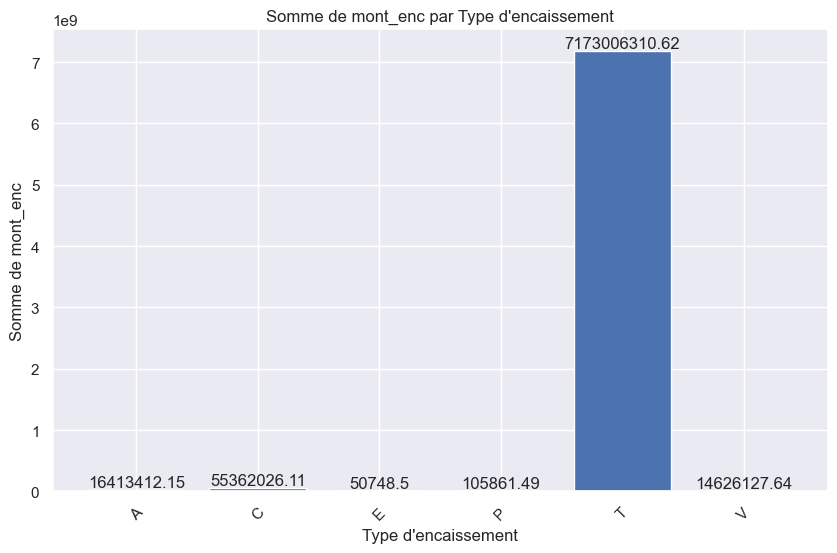

In [59]:
# Summing MONT_ENC for each TYP_ENC
sum_by_type = enc_data.groupby('TYP_ENC')['MONT_ENC'].sum()

plt.figure(figsize=(10, 6))
plt.bar(sum_by_type.index, sum_by_type.values)
plt.xlabel('Type d\'encaissement')
plt.ylabel('Somme de mont_enc')
plt.title('Somme de mont_enc par Type d\'encaissement')
plt.xticks(rotation=45)

# Adding text above each bar
for index, value in enumerate(sum_by_type.values):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

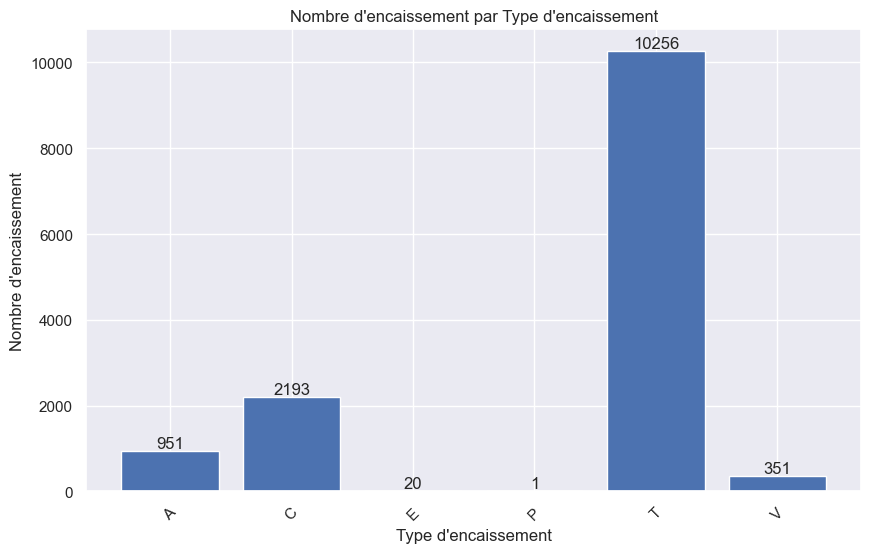

In [60]:
# Summing MONT_ENC for each TYP_ENC
count_by_type = enc_data.groupby('TYP_ENC')['ID_ENC'].count()

plt.figure(figsize=(10, 6))
plt.bar(count_by_type.index, count_by_type.values)
plt.xlabel('Type d\'encaissement')
plt.ylabel('Nombre d\'encaissement')
plt.title('Nombre d\'encaissement par Type d\'encaissement')
plt.xticks(rotation=45)

# Adding text above each bar
for index, value in enumerate(count_by_type.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

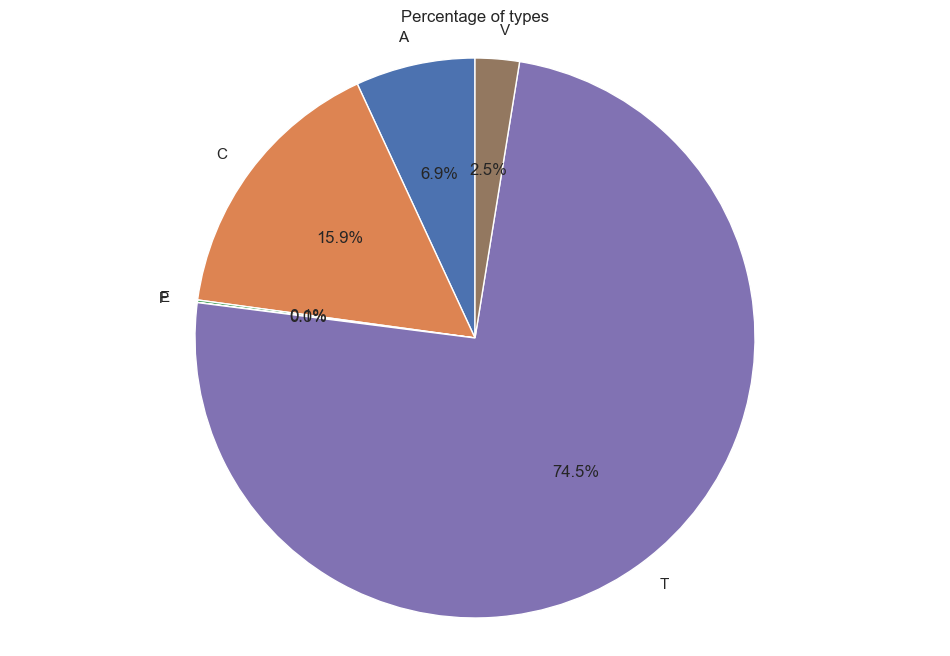

In [61]:
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(count_by_type.values, labels=count_by_type.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of types')

# Display the pie chart
plt.show()

The T type is the most used one 

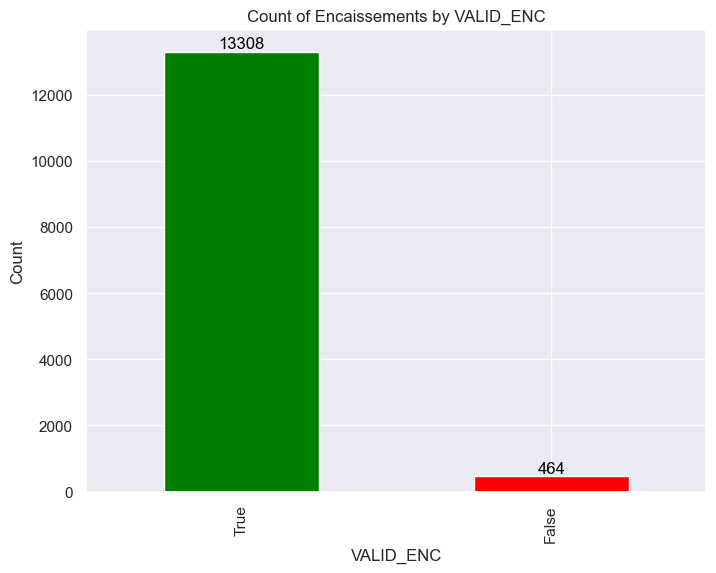

In [62]:
valid_enc_counts = enc_data['VALIDE_ENC'].value_counts()

# Count encaissements by valid_enc
plt.figure(figsize=(8, 6))
bar_plot = valid_enc_counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel('VALID_ENC')
plt.ylabel('Count')
plt.title('Count of Encaissements by VALID_ENC')
plt.xticks(range(len(valid_enc_counts)), valid_enc_counts.index)

# Add text above each bar
for idx, count in enumerate(valid_enc_counts):
    plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

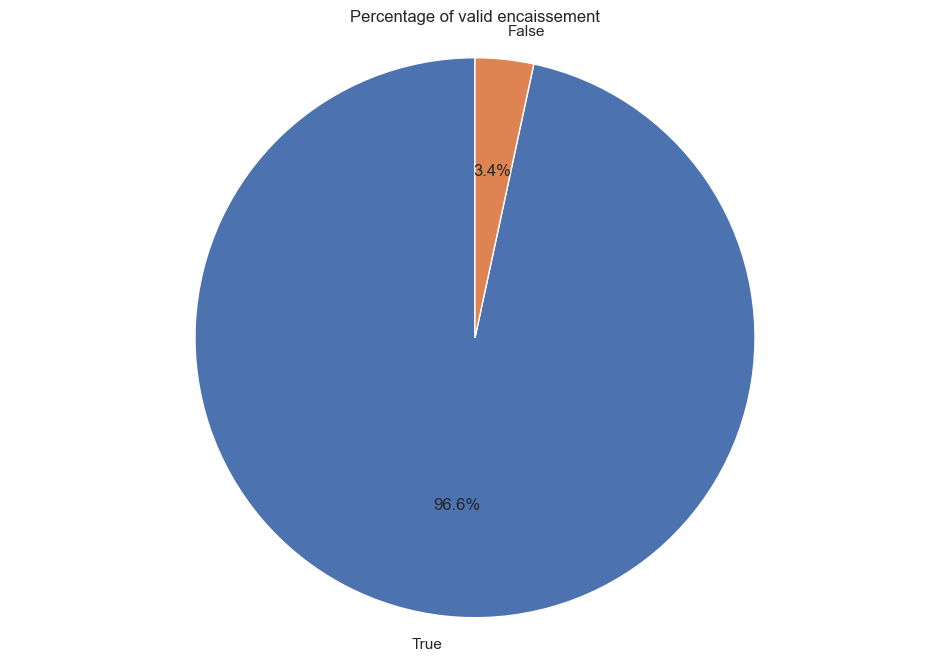

In [63]:
# Create the pie chart with percentage values
plt.figure(figsize=(12, 8))
plt.pie(valid_enc_counts.values, labels=valid_enc_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Percentage of valid encaissement')

# Display the pie chart
plt.show()

According to the pie chart, most of ENC are valid (96.6%)

<Figure size 1000x800 with 0 Axes>

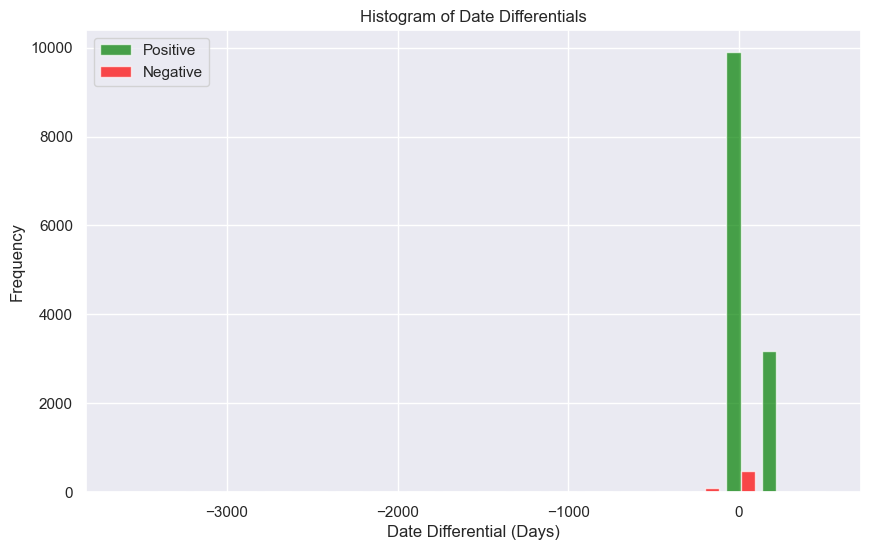

Number of negative differentials:
Date_Diff    578
dtype: int64


In [64]:
# Convertir la colonne 'DAT_VAL_ENC' en type datetime, les dates invalides seront remplacées par NaN
enc_data['DAT_VAL_ENC'] = pd.to_datetime(enc_data['DAT_VAL_ENC'], errors='coerce')

# Calculate the differential between DAT_RECEP and DAT_VAL
enc_data['Date_Diff'] = (enc_data['DAT_VAL_ENC'] - enc_data['DAT_RECEP_ENC']).dt.days

# Create the subplot
plt.figure(figsize=(10, 8))

# Separate positive and negative differentials
positive_diff = enc_data[enc_data['Date_Diff'] >= 0]['Date_Diff']
negative_diff = enc_data[enc_data['Date_Diff'] < 0]['Date_Diff']

# Create a histogram with green color for positive differentials and red color for negative differentials
plt.figure(figsize=(10, 6))
plt.hist([positive_diff, negative_diff], bins=20, color=['green', 'red'], alpha=0.7, label=['Positive', 'Negative'])

plt.xlabel('Date Differential (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Date Differentials')
plt.legend()

plt.show()

# Check for negative differentials
negative_diffs = (enc_data[['Date_Diff']] < 0).sum()

print("Number of negative differentials:")
print(negative_diffs)

In [65]:
negative_diff.sample(10)

1399    -29.0
8361   -160.0
4693    -55.0
8768     -1.0
5046     -1.0
2411    -10.0
7586    -22.0
4903    -13.0
4958    -48.0
6407     -1.0
Name: Date_Diff, dtype: float64

In [66]:
enc_data[enc_data['Date_Diff'] < 0][['DAT_RECEP_ENC', 'DAT_VAL_ENC', 'Date_Diff']].sample(10)

,DAT_RECEP_ENC,DAT_VAL_ENC,Date_Diff
7587,2018-11-08,2018-10-03,-36.0
5925,2018-04-19,2018-03-09,-41.0
3615,2017-03-22,2017-03-01,-21.0
1425,2015-05-28,2015-05-26,-2.0
840,2014-11-27,2014-06-20,-160.0
6020,2018-05-11,2018-05-03,-8.0
4815,2017-09-16,2017-06-30,-78.0
4693,2017-08-17,2017-06-23,-55.0
812,2014-11-24,2014-10-31,-24.0
1033,2015-01-23,2014-12-31,-23.0


It's used to have a delay between the creation or recording of an encaissement and the actual availability or validation of the funds, which is why two separate fields may be used to capture these dates. The difference between DAT_RECEP_ENC and DAT_VAL_ENC may indicate the processing time or clearing time for the payment.

But, it appears that some records mark a negative differential, which may seem not logic

In [67]:
# Dropping the newly-created column 
enc_data = enc_data.drop(['Date_Diff'], axis=1)

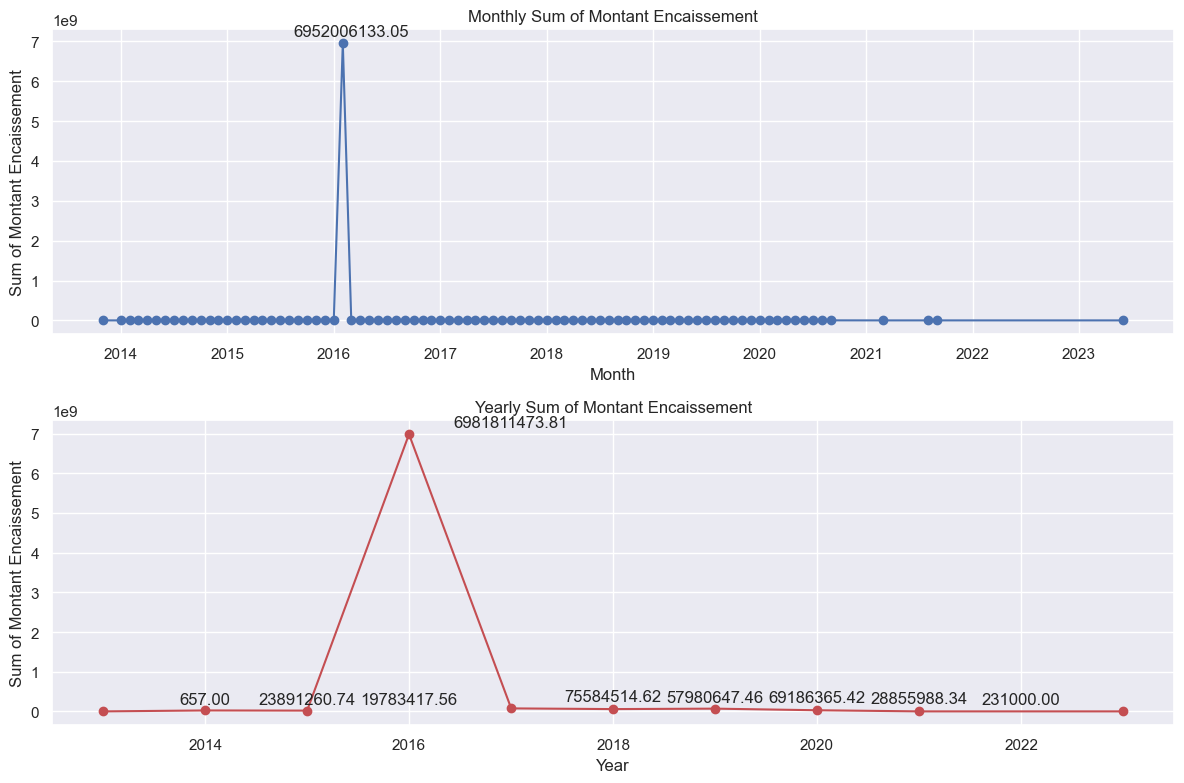

In [68]:
# Group data by month and calculate sum of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('M'))['MONT_ENC'].sum()

# Group data by year and calculate sum of mont_enc
yearly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('Y'))['MONT_ENC'].sum()

# Create two subplots for monthly and yearly sums
plt.figure(figsize=(12, 8))

# Monthly sum subplot
plt.subplot(2, 1, 1)
plt.plot(monthly_sum.index.to_timestamp(), monthly_sum.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Monthly Sum of Montant Encaissement')

# Add text above each point in the monthly sum plot
for i, value in enumerate(monthly_sum.values):
    if i == 26:
        plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

# Yearly sum subplot
plt.subplot(2, 1, 2)
plt.plot(yearly_sum.index.to_timestamp(), yearly_sum.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Yearly Sum of Montant Encaissement')

# Add text above each point in the yearly sum plot
for i, value in enumerate(yearly_sum.values):
    plt.annotate(f'{value:.2f}', (yearly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.tight_layout()
plt.show()

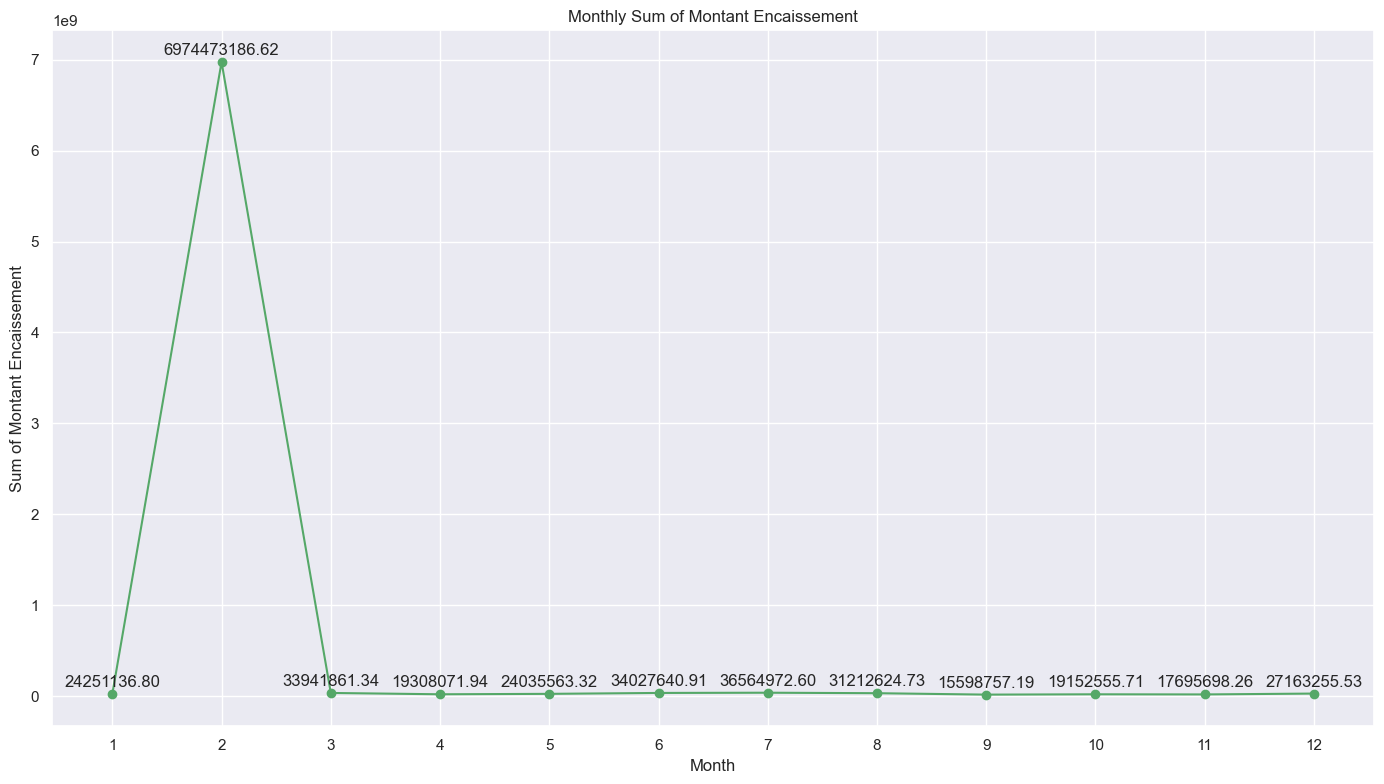

In [69]:
# Group data by month and calculate sum of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.month)['MONT_ENC'].sum()

# Create a plot for the monthly sums
plt.figure(figsize=(14, 8))
plt.plot(monthly_sum.index, monthly_sum.values, marker='o', linestyle='-', color='g')
plt.xlabel('Month')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Monthly Sum of Montant Encaissement')

# Add text above each bar in the plot
for i, value in enumerate(monthly_sum.values):
    plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.xticks(range(1, 13))  # Set x-axis ticks to show all 12 months
plt.tight_layout()
plt.show()

It seems that February 2016 has seen a huge peak in terms of cash inflow

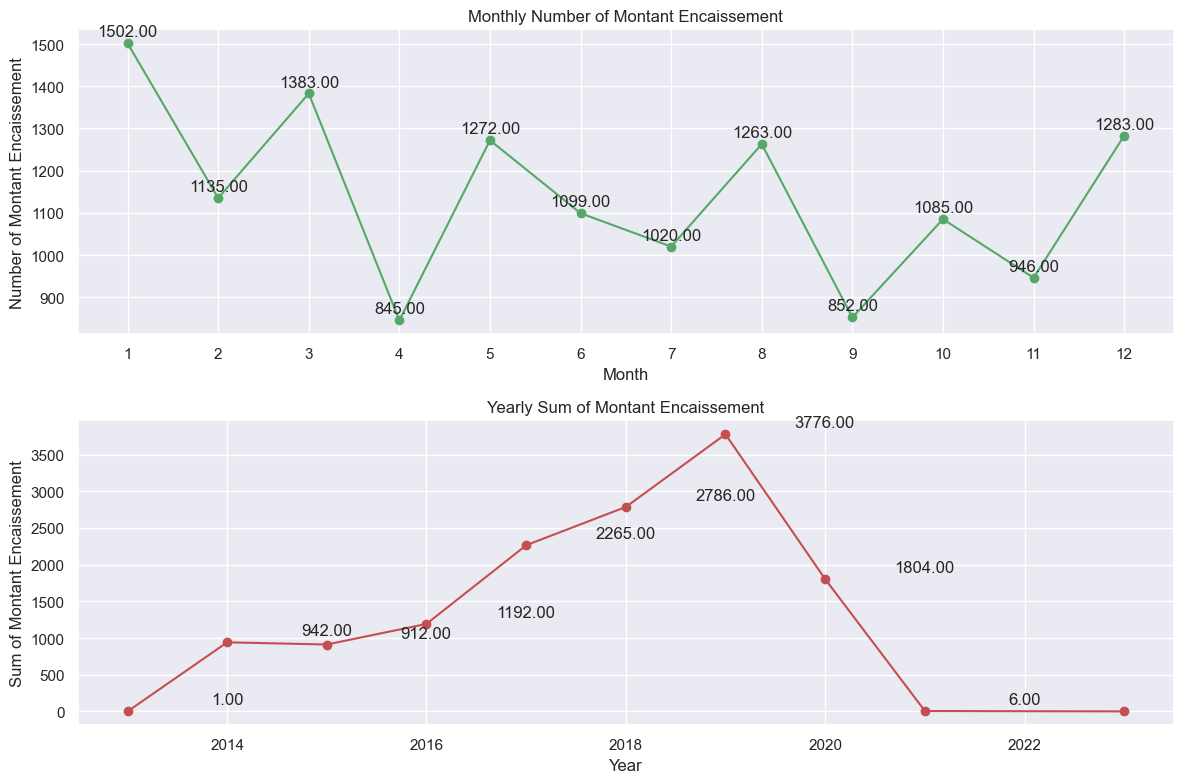

In [70]:
# Group data by month and calculate number of mont_enc
monthly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.month)['MONT_ENC'].count()

# Group data by year and calculate sum of mont_enc
yearly_sum = enc_data.groupby(enc_data['DAT_RECEP_ENC'].dt.to_period('Y'))['MONT_ENC'].count()

# Create two subplots for monthly and yearly sums
plt.figure(figsize=(12, 8))

# Monthly sum subplot
plt.subplot(2, 1, 1)
plt.plot(monthly_sum.index, monthly_sum.values, marker='o', linestyle='-', color='g')
plt.xlabel('Month')
plt.ylabel('Number of Montant Encaissement')
plt.title('Monthly Number of Montant Encaissement')

# Add text above each bar in the plot
for i, value in enumerate(monthly_sum.values):
    plt.annotate(f'{value:.2f}', (monthly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.xticks(range(1, 13)) 

# Yearly sum subplot
plt.subplot(2, 1, 2)
plt.plot(yearly_sum.index.to_timestamp(), yearly_sum.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Sum of Montant Encaissement')
plt.title('Yearly Sum of Montant Encaissement')

# Add text above each point in the yearly sum plot
for i, value in enumerate(yearly_sum.values):
    plt.annotate(f'{value:.2f}', (yearly_sum.index[i], value), textcoords="offset points", xytext=(0, 5),
                 ha='center')

plt.tight_layout()
plt.show()

In [71]:
def sum_count_ref(ref):
    # Group the data by ref_ctr_enc, ref_adh, and ref_ach and calculate the sum and count
    grouped_data = enc_data.groupby([ref])['MONT_ENC'].agg(['sum', 'count']).reset_index()

    # Loop through the groups and print the custom message
    for index, row in grouped_data.iterrows():
        ref_sc = row[ref]
        total_sum = row['sum']
        total_count = row['count']
        
        message = f"For {ref} #{ref_sc}: \n"
        message += f"- Total sum of mont_enc\t\t{total_sum}\n- Total count of mont_enc\t{total_count}"
        print(message)

In [72]:
sum_count_ref('REF_CTR_ENC')

For REF_CTR_ENC #0.0: 
- Total sum of mont_enc		60387.633
- Total count of mont_enc	3.0
For REF_CTR_ENC #9.0: 
- Total sum of mont_enc		3586862.322
- Total count of mont_enc	71.0
For REF_CTR_ENC #10.0: 
- Total sum of mont_enc		1974297.7
- Total count of mont_enc	42.0
For REF_CTR_ENC #11.0: 
- Total sum of mont_enc		142755.16999999998
- Total count of mont_enc	10.0
For REF_CTR_ENC #19.0: 
- Total sum of mont_enc		314111.975
- Total count of mont_enc	1.0
For REF_CTR_ENC #20.0: 
- Total sum of mont_enc		80038.126
- Total count of mont_enc	5.0
For REF_CTR_ENC #21.0: 
- Total sum of mont_enc		1882307.384
- Total count of mont_enc	27.0
For REF_CTR_ENC #22.0: 
- Total sum of mont_enc		864576.101
- Total count of mont_enc	103.0
For REF_CTR_ENC #23.0: 
- Total sum of mont_enc		20045.342
- Total count of mont_enc	1.0
For REF_CTR_ENC #24.0: 
- Total sum of mont_enc		242242.448
- Total count of mont_enc	2.0
For REF_CTR_ENC #25.0: 
- Total sum of mont_enc		6416080.001
- Total count of mont_enc	164

In [73]:
sum_count_ref('REF_ADH_ENC')

For REF_ADH_ENC #1.0: 
- Total sum of mont_enc		4608574.459
- Total count of mont_enc	844.0
For REF_ADH_ENC #3.0: 
- Total sum of mont_enc		2066889.705
- Total count of mont_enc	31.0
For REF_ADH_ENC #4.0: 
- Total sum of mont_enc		89640.937
- Total count of mont_enc	6.0
For REF_ADH_ENC #5.0: 
- Total sum of mont_enc		256648.412
- Total count of mont_enc	3.0
For REF_ADH_ENC #6.0: 
- Total sum of mont_enc		20045.342
- Total count of mont_enc	1.0
For REF_ADH_ENC #7.0: 
- Total sum of mont_enc		3763264.09
- Total count of mont_enc	53.0
For REF_ADH_ENC #8.0: 
- Total sum of mont_enc		40073706.946
- Total count of mont_enc	1026.0
For REF_ADH_ENC #9.0: 
- Total sum of mont_enc		7014714841.396
- Total count of mont_enc	1496.0
For REF_ADH_ENC #18.0: 
- Total sum of mont_enc		10209820.3
- Total count of mont_enc	31.0
For REF_ADH_ENC #45.0: 
- Total sum of mont_enc		2241326.634
- Total count of mont_enc	2.0
For REF_ADH_ENC #81.0: 
- Total sum of mont_enc		5922058.988
- Total count of mont_enc	414

In [74]:
sum_count_ref('REF_ACH_ENC')

For REF_ACH_ENC #1.0: 
- Total sum of mont_enc		65599.998
- Total count of mont_enc	2.0
For REF_ACH_ENC #2.0: 
- Total sum of mont_enc		10000.0
- Total count of mont_enc	1.0
For REF_ACH_ENC #3.0: 
- Total sum of mont_enc		1799864.939
- Total count of mont_enc	4.0
For REF_ACH_ENC #7.0: 
- Total sum of mont_enc		607680.515
- Total count of mont_enc	15.0
For REF_ACH_ENC #8.0: 
- Total sum of mont_enc		1868368.053
- Total count of mont_enc	23.0
For REF_ACH_ENC #9.0: 
- Total sum of mont_enc		741548.236
- Total count of mont_enc	10.0
For REF_ACH_ENC #10.0: 
- Total sum of mont_enc		1788740.401
- Total count of mont_enc	221.0
For REF_ACH_ENC #11.0: 
- Total sum of mont_enc		611146.828
- Total count of mont_enc	53.0
For REF_ACH_ENC #12.0: 
- Total sum of mont_enc		662534.958
- Total count of mont_enc	283.0
For REF_ACH_ENC #13.0: 
- Total sum of mont_enc		1393746.562
- Total count of mont_enc	53.0
For REF_ACH_ENC #14.0: 
- Total sum of mont_enc		149635.204
- Total count of mont_enc	67.0
For RE

In [75]:
# Group the data by REF_ADH_ENC and REF_ACH_ENC and get the top 5 MONT_ENC per ref
top_ref_adh = enc_data.groupby('REF_ADH_ENC')['MONT_ENC'].apply(lambda x: x.nlargest(5).sum())
top_ref_ach = enc_data.groupby('REF_ACH_ENC')['MONT_ENC'].apply(lambda x: x.nlargest(5).sum())

# Reset the index to obtain the grouped data
top_ref_adh = top_ref_adh.reset_index()
top_ref_ach = top_ref_ach.reset_index()

# Sort top_ref_adh by the sum of 'MONT_ENC' values in descending order
top_ref_adh = top_ref_adh.sort_values(by='MONT_ENC', ascending=False)
top_ref_ach = top_ref_ach.sort_values(by='MONT_ENC', ascending=False)

# Filter the data to include only the top 5 refs
desired_refs_adh = top_ref_adh.head(5)['REF_ADH_ENC']
desired_refs_ach = top_ref_ach.head(5)['REF_ACH_ENC']

top_ref_adh = top_ref_adh[top_ref_adh['REF_ADH_ENC'].isin(desired_refs_adh)]
top_ref_ach = top_ref_ach[top_ref_ach['REF_ACH_ENC'].isin(desired_refs_ach)]

# Print the data
print("top_ref_adh:")
print(top_ref_adh)

print("top_ref_ach:")
print(top_ref_ach)


top_ref_adh:
    REF_ADH_ENC      MONT_ENC
7           9.0  6.952906e+09
33        309.0  1.636856e+07
47        491.0  1.193388e+07
25        204.0  9.096790e+06
60        591.0  6.507924e+06
top_ref_ach:
     REF_ACH_ENC      MONT_ENC
24          31.0  6.950269e+09
399        506.0  1.616776e+07
67          81.0  1.188312e+07
128        206.0  8.646984e+06
462        591.0  6.416122e+06


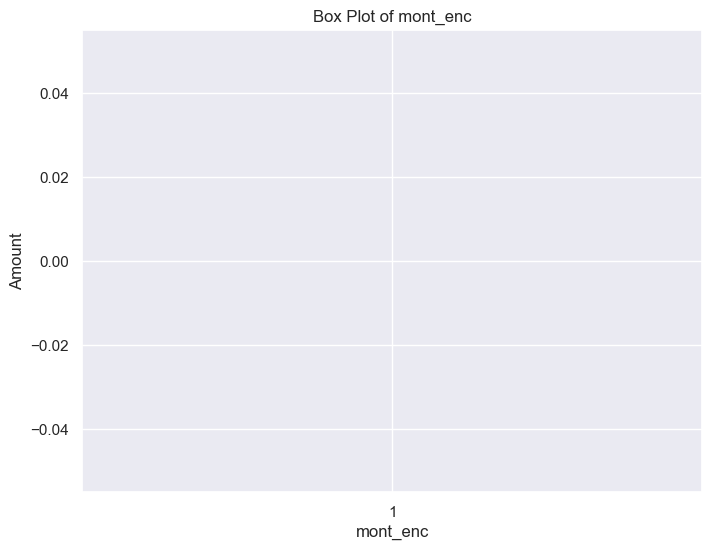

In [76]:
# Create a box plot to visualize the distribution of mont_enc
plt.figure(figsize=(8, 6))
plt.boxplot(enc_data['MONT_ENC'])
plt.xlabel('mont_enc')
plt.ylabel('Amount')
plt.title('Box Plot of mont_enc')
plt.show()

In [77]:
# Calculate z-scores for mont_enc
z_scores = stats.zscore(enc_data['MONT_ENC'])

# Set the threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Find the indices of potential outliers
outlier_indices = [index for index, z_score in enumerate(z_scores) if abs(z_score) > threshold]

# Get the values of mont_enc that are potential outliers
potential_outliers = enc_data['MONT_ENC'].iloc[outlier_indices]

# Print the potential outliers
print("Potential Outliers in mont_enc:")
print(potential_outliers)


Potential Outliers in mont_enc:
Series([], Name: MONT_ENC, dtype: float64)


In the box plot, the outliers are represented as individual points outside the "whiskers" of the box. These points are considered potential outliers, and any data points beyond the whiskers can be further investigated.

But as long as nothing is shown in the graph (box plot) and there are empty z-scores, it means that there are no potential outliers in the mont_enc column based on the chosen method (box plot and z-scores).

### **Data Cleaning**

The cleaning phase in data preprocessing is crucial for ensuring data quality and reliability in any data analysis or machine learning project.

##### **Cleaning Worktools**

This section handles all the preparation methods for dealing with missing values and any unreliable data.

In [78]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drop one or multiple columns from a DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        columns_to_drop (str or list of str): The column name(s) to drop.
        
    Returns:
        pd.DataFrame: The DataFrame with the specified columns dropped.
    """
    if isinstance(columns_to_drop, str):
        columns_to_drop = [columns_to_drop]

    return dataframe.drop(columns=columns_to_drop, axis=1)


This method works on dropping the whole column(s) from the dataframe. It's going to be used once we encounter one or multiple fields that are fully null or most of the rows are null.

In [79]:
def drop_nan_rows(dataframe, subset):
    """
    Drop rows that contain NaN/NaT or all blank values (spaces) in the DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        subset (list of str): The column names to consider when dropping rows.
        
    Returns:
        pd.DataFrame: The DataFrame with rows containing NaN or NaT values dropped.
    """
    # Drop rows with any NaN or NaT values
    dataframe = dataframe.dropna(subset=subset)

    # Drop rows where all values are blank spaces
    condition = dataframe.apply(lambda row: row.str.strip().eq('')).all(axis=1)
    dataframe = dataframe[~condition]

    return dataframe

This method serves to removing just a number of rows within a subset of fields that contains null values (NaN, NaT) or blank values.

In [80]:
def fill_missing_values(dataframe):
    """
    Replace missing values in a DataFrame with appropriate fill values based on data type.
    
    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.
    
    Parameters:
        dataframe: The input DataFrame.
        
    Returns:
        The DataFrame with missing values replaced.
    """
    # Replace blank spaces with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill missing values in numerical columns with the median
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())
    
    # Fill missing values in categorical columns with the most frequent value
    categorical_columns = dataframe.select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])
    
    return dataframe


This method is being defined to replace missing values in a DataFrame with appropriate fill values based on data type. As a choice, we are tending to replace the numerical columns with the median and the categorical columns with the most frequent values (the mode, statistically speaking)


In [81]:
def switch_if_negative_diff(dataframe, dt1, dt2):
    """
    Switches the values of datetime1 (dt1) and datetime2 (dt2) in the dataframe
    if datetime1 is greater than datetime2.

    Args:
        dataframe: the dataframe containing 'datetime1' and 'datetime2' columns.
        dt1 (str): the field's name representing the first datetime
        dt2 (str): the field's name representing the second datetime

    Returns:
        The permuted dataframe with switched datetime values if applicable.
    """
    mask = dataframe[dt1] > dataframe[dt2]
    dataframe.loc[mask, [dt1, dt2]] = dataframe.loc[mask, [dt2, dt1]].values
    dataframe[dt1] = dataframe[dt1].apply(pd.to_datetime)
    dataframe[dt2] = dataframe[dt2].apply(pd.to_datetime)
    return dataframe

The role of this method is toggling between 2 datetimes that have negative differential.

In [82]:
def interpolate_datetime_nulls(dataframe, column_name):
    """
    Replace null datetime values in a DataFrame column using time-based interpolation.

    Parameters:
        dataframe: The DataFrame containing the column with null datetime values.
        column_name (str): The name of the column with datetime values to interpolate.

    Returns:
        The DataFrame with null datetime values replaced by interpolated values.
    """
    # Convert the specified column to datetime dtype
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])

    # Perform interpolation for missing values using 'bfill' method
    dataframe[column_name] = dataframe[column_name].fillna(method='bfill')
    
    return dataframe

This method takes a DataFrame and the name of the column with datetime values that need interpolation. Interpolation is a mathematical method that estimates the missing values based on the known values surrounding them.

Pandas provides the `interpolate()` method, which can be used to perform linear or time-based interpolation on datetime columns.

The resulting DataFrame will have the null datetime values replaced with interpolated values based on the surrounding known values and the time differences between them.

In [83]:
def fetch_nan_columns(dataframe, threshold = 0.5):
    """
    Fetches the null columns and Separates the most nullified columns for the others.

    Parameters:
        dataframe: The DataFrame containing the column with null values.
        threshold (float): A metric with which we separate the dataframe 
                           based upon holding missing values.

    Returns:
        Two lists of columns names.
    """
    # Store the number of null values within a dataframe df
    df = pd.DataFrame(dataframe.isna().sum(), columns=['Nb_null'])

    # Separate the number of nuls that surpass the length of the dataframe
    cols_to_drop = df[df['Nb_null'] > dataframe.shape[0] * threshold]

    # Separate the number of nuls that are less than the length of the dataframe except 0
    cols_to_manipulate_nan = df[(df['Nb_null'] <= dataframe.shape[0] * threshold) & (df['Nb_null'] > 0)]

    # Return just the name of columns
    return cols_to_drop.index, cols_to_manipulate_nan.index

This method stands out as a way of retrieving the columns that have missing values

In [84]:
def fill_missing_values_subset(dataframe, subset_columns):
    """
    Replace missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.

    Args:
        dataframe: The input DataFrame.
        subset_columns: List of column names to fill missing values in.

    Returns:
        The DataFrame with missing values replaced for the specified subset of columns.
    """
    # Fill missing values in numerical columns of the subset with the median
    numeric_columns = dataframe[subset_columns].select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())

    # Fill missing values in categorical columns of the subset with the most frequent value
    categorical_columns = dataframe[subset_columns].select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])

    return dataframe

This method replaces missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

def replace_nan_with_knn_classifier(dataframe, target_column, n_neighbors=5):
    """
    Replace NaN values in the target column of the DataFrame using k-Nearest Neighbors (k-NN) classification for prediction.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the column containing NaN values to be predicted. Default is 'LOGIN_USER'.
        n_neighbors (int): The number of neighbors to consider for k-NN classification. Default is 5.

    Returns:
        pd.DataFrame: The DataFrame with NaN values in the specified column replaced with predicted values.
    """
    # Make a copy of the original DataFrame
    df_copy = dataframe.copy()

    # Store the data types of datetime columns for conversion back after label encoding
    datetime_columns = df_copy.select_dtypes(include='datetime64').columns

    # Drop datetime columns temporarily
    df_copy.drop(columns=datetime_columns, inplace=True)

    # Label encode all the categorical columns
    label_encoder = LabelEncoder()
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.fit_transform(df_copy[col].astype(str))

    # Separate the DataFrame into null and non-null values in the target column
    df_not_null = df_copy.dropna(subset=[target_column])
    df_null = df_copy[df_copy[target_column].isnull()]

    # Check if there are non-null values in the target column
    if len(df_not_null) == 0:
        raise ValueError("No non-null values found in the target column.")

    # Features and target for non-null values
    features_not_null = df_not_null.drop(target_column, axis=1)
    target_not_null = df_not_null[target_column]

    # Fit the non-null values to the k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(features_not_null, target_not_null)

    # Reorder columns in df_null to match the order of features_not_null
    df_null_reordered = df_null[features_not_null.columns]
    print(df_null.head())
    print(len(df_null) > 0)
    # Check if there are any null values to predict
    if len(df_null) > 0:
        # Predict the null values in the target column
        predicted_labels = knn_classifier.predict(df_null_reordered)

        # Convert the predicted labels back to original categorical values using the original label encoder
        predicted_values = label_encoder.inverse_transform(predicted_labels)
        print(predicted_values)
        # Replace NaN values in the target column with predicted values
        df_copy.loc[df_copy[target_column].isnull(), target_column] = predicted_values

    # Convert the target column back to the original labels
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.inverse_transform(df_copy[col])

    # Restore the datetime columns
    for col in datetime_columns:
        df_copy[col] = dataframe[col]

    return df_copy


This method works on replacing NaN values in a specific column of the DataFrame using k-Nearest Neighbors (k-NN) imputation.

In [86]:
def replace_label_encoded_values(df_encoded, df_categorical, target_column):
    """
    Replace label encoded values in the DataFrame 'df_encoded' with the corresponding categorical values from 'df_categorical'.

    Parameters:
        df_encoded (pd.DataFrame): The DataFrame containing label encoded values to be replaced.
        df_categorical (pd.DataFrame): The DataFrame containing the corresponding categorical values.
        target_column (str): The name of the target column to replace the values.

    Returns:
        pd.DataFrame: The DataFrame 'df_encoded' with the label encoded values replaced by the categorical values.
    """
    # Create a mapping dictionary to store label encoded values and their corresponding alphabetical values
    mapping = {}

    # Iterate over the target column in both DataFrames simultaneously
    for encoded_val, categorical_val in zip(df_encoded[target_column], df_categorical[target_column]):
        if not pd.isna(encoded_val) and not pd.isna(categorical_val):
            # Store the mapping of label encoded value to the corresponding alphabetical value
            mapping[encoded_val] = categorical_val

    # Replace label encoded values with their corresponding categorical values
    df_encoded[target_column] = df_encoded[target_column].replace(mapping)

    return df_encoded


##### **Encaissement Table**

In [87]:
cols_to_drop, cols_to_inpute = fetch_nan_columns(enc_data)
enc_data[cols_to_drop].isna().sum()

BORD_ENC    13747
PREAVIS     13772
dtype: int64

In [88]:
enc_data[cols_to_inpute].isna().sum()

REF_ADH_ENC         3
REF_ACH_ENC         5
MONT_ENC            1
DEVISE_ENC         45
DAT_RECEP_ENC      87
DAT_VAL_ENC        91
REF_ENC             4
RIB_ENC           917
REF_SEQ_ENC      1923
dtype: int64

Just stored the columns that are going to be fully dropped in cols_to_drop and the rest of the columns that have some null values in cols_to_inpute

In [89]:
enc_data = drop_columns(dataframe=enc_data, columns_to_drop=cols_to_drop)
enc_data.isna().sum()

ID_ENC              0
REF_CTR_ENC         0
REF_ADH_ENC         3
REF_ACH_ENC         5
MONT_ENC            1
DEVISE_ENC         45
DAT_RECEP_ENC      87
DAT_VAL_ENC        91
TYP_ENC             0
VALIDE_ENC          0
REF_ENC             4
RIB_ENC           917
REF_SEQ_ENC      1923
dtype: int64

We successfully removed the variables that are filled mostly with NaNs

In [90]:
# Drop REF_SEQ_ENC and RIB_ENC columns as we won't use it later
enc_data = drop_columns(dataframe=enc_data, columns_to_drop=['REF_SEQ_ENC', 'RIB_ENC'])

# Checking whether the column still exist
'REF_SEQ_ENC' in enc_data.columns and 'RIB_ENC' in enc_data.columns

False

Now I am going to do some investigation on DateTime variables in which I would like to know the position of the single NaT value in DAT_RECEP_ENC and DAT_VAL_ENC

In [91]:
enc_data[['DAT_RECEP_ENC', 'DAT_VAL_ENC']].head()

,DAT_RECEP_ENC,DAT_VAL_ENC
0,NaT,NaT
1,NaT,NaT
2,NaT,NaT
3,NaT,NaT
4,NaT,NaT


Alongside the existence of null values for datetimes, we have to remember back that there are about 500 negative differentials (DAT_VAL_ENC comes before DAT_RECEP_ENC) and this should not happen. So as a rectification, we will, in the first hand, interpolate all the NaTs, then we will be flipping the position of the corresponding dates.

In [92]:
# Interpose null datetimes
enc_data = interpolate_datetime_nulls(enc_data, 'DAT_RECEP_ENC')
enc_data = interpolate_datetime_nulls(enc_data, 'DAT_VAL_ENC')

# Check missing values again in DAT_RECEP_ENC and DAT_VAL_ENC
enc_data[['DAT_RECEP_ENC', 'DAT_VAL_ENC']].head()

,DAT_RECEP_ENC,DAT_VAL_ENC
0,2014-03-01,2014-07-02
1,2014-03-01,2014-07-02
2,2014-03-01,2014-07-02
3,2014-03-01,2014-07-02
4,2014-03-01,2014-07-02


In [93]:
# Calculate the differential between DAT_RECEP and DAT_VAL
enc_data['Date_Diff'] = (enc_data['DAT_VAL_ENC'] - enc_data['DAT_RECEP_ENC']).dt.days

# Inspect 10 last samples of negative differentials
enc_data[enc_data['Date_Diff'] < 0][['DAT_RECEP_ENC', 'DAT_VAL_ENC', 'Date_Diff']].tail(10)

,DAT_RECEP_ENC,DAT_VAL_ENC,Date_Diff
10700,2019-08-14,2019-01-16,-210
10711,2019-08-19,2019-07-31,-19
10718,2019-08-20,2019-06-30,-51
10721,2019-08-20,2019-06-30,-51
10727,2019-08-20,2019-08-09,-11
10749,2019-08-22,2019-06-27,-56
10838,2019-08-27,2019-06-27,-61
10988,2019-09-18,2019-07-23,-57
11245,2019-10-09,2019-09-13,-26
11326,2019-10-21,2019-03-31,-204


In [94]:
# Switch negative differentials
enc_data = switch_if_negative_diff(enc_data, 'DAT_RECEP_ENC', 'DAT_VAL_ENC')

# Verify output
enc_data.iloc[[10700, 10711]][['DAT_RECEP_ENC',	'DAT_VAL_ENC']]

# Dropping the newly-created column 
enc_data = enc_data.drop(['Date_Diff'], axis=1)

I used backward fill (bfill) to eliminate time-based data and flipped them off. It's time to fill the null values with either median for numerical columns or mode for categorical variables

In [95]:
enc_data.isna().sum()

ID_ENC            0
REF_CTR_ENC       0
REF_ADH_ENC       3
REF_ACH_ENC       5
MONT_ENC          1
DEVISE_ENC       45
DAT_RECEP_ENC     0
DAT_VAL_ENC       0
TYP_ENC           0
VALIDE_ENC        0
REF_ENC           4
dtype: int64

In [96]:
# Cast REF_CTR_HIST and REF_IND_HIST to object data type (string)
enc_data['REF_ADH_ENC'] = enc_data['REF_ADH_ENC'].astype(str)
enc_data['REF_ACH_ENC'] = enc_data['REF_ACH_ENC'].astype(str)
enc_data['REF_ACH_ENC'] = enc_data['REF_ACH_ENC'].replace('nan', np.nan)
enc_data['REF_ADH_ENC'] = enc_data['REF_ADH_ENC'].replace('nan', np.nan)

# Fill missing values
enc_data = fill_missing_values_subset(enc_data, ['REF_ADH_ENC', 'REF_ACH_ENC', 'MONT_ENC', 'DEVISE_ENC', 'REF_ENC'])

In [97]:
enc_data.isna().sum()

ID_ENC           0
REF_CTR_ENC      0
REF_ADH_ENC      0
REF_ACH_ENC      0
MONT_ENC         0
DEVISE_ENC       0
DAT_RECEP_ENC    0
DAT_VAL_ENC      0
TYP_ENC          0
VALIDE_ENC       0
REF_ENC          0
dtype: int64

Great output .. everything goes well so far.

In [98]:
# Just to confirm the result
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID_ENC         13772 non-null  int64         
 1   REF_CTR_ENC    13772 non-null  int64         
 2   REF_ADH_ENC    13772 non-null  object        
 3   REF_ACH_ENC    13772 non-null  object        
 4   MONT_ENC       13772 non-null  float64       
 5   DEVISE_ENC     13772 non-null  object        
 6   DAT_RECEP_ENC  13772 non-null  datetime64[ns]
 7   DAT_VAL_ENC    13772 non-null  datetime64[ns]
 8   TYP_ENC        13772 non-null  object        
 9   VALIDE_ENC     13772 non-null  bool          
 10  REF_ENC        13772 non-null  object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 1.1+ MB


In [99]:
# Get numerical columns
numerical_columns = enc_data.select_dtypes(include=[np.number])

# Check if all values in numerical columns are less than 0
if (numerical_columns >= 0).all().all():
    print("All numerical columns have values greater or equal 0.")
else:
    print("Not all numerical columns have values greater or equal 0 0.")


All numerical columns have values greater or equal 0.


In [100]:
# Check for negative values in each numerical column
negative_columns = (numerical_columns < 0)
negative_counts = negative_columns.sum()
negative_positions = negative_columns.idxmax()

# Create a DataFrame to store the results
negative_info = pd.DataFrame({
    'Column Name': negative_positions,
    'Number of Negative Values': negative_counts
})

print(negative_info)


             Column Name  Number of Negative Values
ID_ENC                 0                          0
REF_CTR_ENC            0                          0
MONT_ENC               0                          0


In [101]:
# Export the cleaned DataFrame
enc_data.to_csv('T_ENCAISSEMENT2.csv', index=False)